# Graph clustering by Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [1]:
import numpy as np

## Undirected graphs

In [2]:
from sknetwork.toy_graphs import karate_club_graph
from sknetwork.clustering import Louvain, modularity

**Loading**

In [3]:
adjacency = karate_club_graph()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
louvain = Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [5]:
labels = louvain.labels_
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [6]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
colors = ['r','g','b','c','m','y']

In [10]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


**Metrics**

In [11]:
np.round(modularity(adjacency,labels),2)

0.42

## Directed graphs

In [12]:
from sknetwork.toy_graphs import painters_graph

**Loading**

In [13]:
adjacency, names = painters_graph(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [14]:
louvain = Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [15]:
labels = louvain.labels_
print(labels)

[2 0 1 0 1 1 3 0 2 1 2 0 0 3]


In [16]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [5 4 3 2]


**Visualization**

In [17]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [18]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

In [19]:
colors = ['r','g','b','c','m','y']

/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


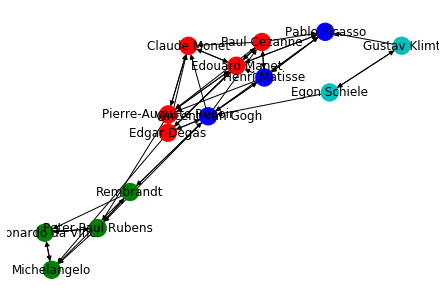

In [20]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph],labels = names)

**Metrics**

In [21]:
np.round(modularity(adjacency,labels),2)

0.32

## Bipartite graphs

In [22]:
from sknetwork.toy_graphs import movie_actor_graph
from sknetwork.clustering import BiLouvain, bimodularity

**Loading**

In [23]:
biadjacency, movies, actors = movie_actor_graph(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [24]:
bilouvain = BiLouvain()
bilouvain.fit(biadjacency)

BiLouvain(resolution=1, tol=0.001, agg_tol=0.001, max_agg_iter=-1, engine='numba', verbose=False)

In [25]:
labels = bilouvain.labels_
feature_labels = bilouvain.feature_labels_
print(labels, feature_labels)

[2 2 1 3 0 3 3 1 4 0 4 1 2 0 0] [0 2 2 1 3 1 0 3 1 4 4 0 0 1 0 2]


In [26]:
unique_labels, counts = np.unique(labels, return_counts = True)
_,feature_counts = np.unique(feature_labels, return_counts = True)
print(unique_labels, counts, feature_counts)

[0 1 2 3 4] [4 3 3 3 2] [5 4 3 2 2]


In [27]:
# Graph as undirected (ignoring the bipartite structure)
bilouvain.fit(biadjacency, force_undirected=True)

BiLouvain(resolution=1, tol=0.001, agg_tol=0.001, max_agg_iter=-1, engine='numba', verbose=False)

In [28]:
labels2 = bilouvain.labels_
feature_labels2 = bilouvain.feature_labels_
print(labels2, feature_labels2)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [29]:
unique_labels2, counts2 = np.unique(labels2, return_counts = True)
_,feature_counts2 = np.unique(feature_labels2, return_counts = True)
print(unique_labels2, counts2, feature_counts2)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


**Visualization**

In [30]:
from sknetwork.utils import bipartite2undirected

In [31]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [32]:
adjacency = bipartite2undirected(biadjacency)

In [33]:
graph = from_scipy_sparse_matrix(adjacency)

In [34]:
colors = ['r','g','b','c','m','y']

In [35]:
n,p = biadjacency.shape
pos = {i: (0,i) for i in range(n)} 
pos.update({n + i: (2,i) for i in range(p)})

In [36]:
pos_labels = {i: (0.5,i) for i in range(n)} 
pos_labels.update({n + i: (1.5,i) for i in range(p)})

In [37]:
names = movies
names.update({n + i: actors[i] for i in actors})

/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


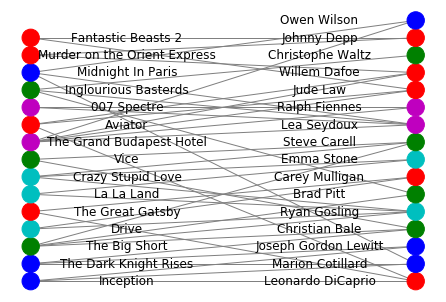

In [38]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels, feature_labels)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

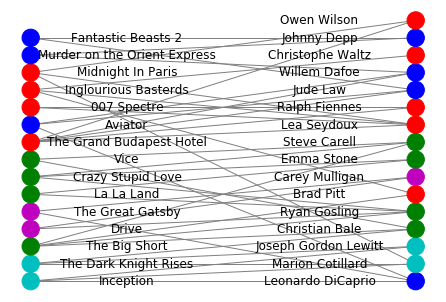

In [39]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels2, feature_labels2)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

**Metrics**

In [44]:
np.round(bimodularity(biadjacency,labels,feature_labels),5)

0.55086

In [41]:
np.round(bimodularity(biadjacency,labels2,feature_labels2),2)

0.57

In [45]:
np.round(modularity(adjacency,np.append(labels, feature_labels)),5)

0.54759

In [43]:
np.round(modularity(adjacency,np.append(labels2, feature_labels2)),2)

0.57